# Objetivos: 
● Seleccionar los datos a modelar. Justificar esa selección. (Ver notebook *'Grupo_06_DATASET.ipynb'*

● Entrenar al menos tres modelos de clasificación distintos sobre estos datos. 

● Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno. ● Determinar la importancia de las features incluidas en la predicción. Interpretar.

# WORKSHOP 3- Machine Learning Modelos de Clasificacion Avanzados

# Requisitos:
Los materiales deberán ser entregados en una Jupyter notebook que satisfaga los
requerimientos del proyecto. La notebook deberá estar debidamente comentada. Además,
los grupos deberán crear un repositorio para el proyecto (anonimizado) en Github. Para la
presentación deben armar algunos slides y grabar un video que exponga los resultados
obtenidos en no más de 10 minutos.


# Selección de datos a modelar. Justificación de selección
## Tabla de Contenidos

- [1. Objetivo Hipotesis ](#hip)
    - [1.1 Hipotesis nula](#hipnul)
    - [1.2 Definición de variables](#defvar)
- [2. Modelo Regresión Logística](#RL)
    - [2.1 Evaluación](#RLEva)
    - [2.2. Visualización](#RLV)
    - [2.3. Conclusiones](#RLconc)
- [3. Modelo KNN](#KNN)
    - [3.1. Evaluación](#KNNEva)
    - [3.2. Visualización](#KNNV)
    - [3.3. Conclusiones](#KNNconc)
- [4. Modelo Naives Bayes](#NB)
    - [4.1. Evaluación](#NBEva)
    - [4.2. Visualización](#NBV)
    - [4.3. Conclusiones](#NBconc)
- [5. Modelo Árbol de Decisión](#AD)
    - [5.1. Evaluación](#ADEva)
    - [5.2. Visualización](#ADV)
    - [5.3. Conclusiones](#ADconc)
- [6. Comparativa](#com)
    - [6.1. Conclusiones](#comconc)

### Segundo Analisis
- [1. Objetivo Hipotesis Balaceado](#hipB)
    - [1.1 Hipotesis Nula](#hipnulB)
    - [1.2 Definición de variables](#defvarB)
- [2. Modelo Regresión Logística Balaceado](#RLB)
    - [2.1 Evaluación](#RLEvaB)
    - [2.2. Visualización](#RLVB)
    - [2.3. Conclusiones](#RLconcB)
- [3. Modelo KNN Balaceado](#KNNB)
    - [3.1. Evaluación](#KNNEvaB)
    - [3.2. Visualización](#KNNVB)
    - [3.3. Conclusiones](#KNNconcB)
- [4. Modelo Naives Bayes Balaceado](#NBB)
    - [4.1. Evaluación](#NBEvaB)
    - [4.2. Visualización](#NBVB)
    - [4.3. Conclusiones](#NBconcB)
- [5. Modelo Árbol de Decisión Balaceado](#ADB)
    - [5.1. Evaluación](#ADEvaB)
    - [5.2. Visualización](#ADVB)
    - [5.3. Conclusiones](#ADconcB)
- [6. Comparativa Balaceado](#comB)
    - [6.1. Conclusiones](#comconcB)

<a id="hip"></a>
 # Objetivo - Hipotesis:

El objetivo de este trabajo es: 

Evaluar la hipótesis de que, dada una canción de un determinado género, el modelo sea capaz de categorizarla correctamente.

- Features: acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence. 

- Target: Género al que pertenece

Empezaremos prediciendo el género rock. 





In [3]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [1]:
import plotly.express as px 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve, mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from statsmodels.stats.weightstats import ttest_ind

In [4]:
escalado= pd.read_csv('escalado.csv')

In [5]:
escalado.tail()

,Unnamed: 0,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,genre_Anime,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
217845,232720,39,0.00384,0.687,0.714,0.544000,0.0845,0.0316,0.962,0,...,0,0,0,0,0,0,0,1,0,0
217846,232721,38,0.03290,0.785,0.683,0.000880,0.2370,0.0337,0.969,0,...,0,0,0,0,0,0,0,1,0,0
217847,232722,47,0.90100,0.517,0.419,0.000000,0.0945,0.1480,0.813,0,...,0,0,0,0,0,0,0,1,0,0
217848,232723,44,0.26200,0.745,0.704,0.000000,0.3330,0.1460,0.489,0,...,0,0,0,0,0,0,0,1,0,0
217849,232724,35,0.09730,0.758,0.470,0.000049,0.0836,0.0287,0.479,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#HACER PROPORCIÓN DEL ROCK
a=(escalado['genre_Rock']!=0).sum()
b=(escalado['genre_Rock']==0).sum()
c=a+b
#d=escalado['genre_Rock'].value_counts()
k=((a/c)*100)
print("la proporcion de canciones en genero rock es :",k.round(4) )
#k es la proporcion de rock en el total de canciones 
l=((b/c)*100)
print("la proporcion de canciones en genero no rock es :",l.round(4))



la proporcion de canciones en genero rock es : 4.2561
la proporcion de canciones en genero no rock es : 95.7439


In [7]:
H0 = l/100

<a id="hipnul"></a>
## Hipotesis Nula

A continuación se definirán las features y el target objetivo.
También se prepara el set de testeo para evaluar los modelos. 
Se guarda el 30% de los datos para hacer luego la prueba.
    
H0: p = 95.7439 El modelo no puede predecir el género Rock mejor que la probabilidad dada por la regla de tres. Es decir el accuracy de los modelos no da mayor que la proporción.

H1: p > 95.7439 El modelo puede predecir que la canción sea del género Rock. Es decir que el modelo entrenado tenga un accuracy mayor a la proporción. 

<a id="defvar"></a>
## Definición de variables

A continuación se definirán las features y el target objetivo.
También se prepara el set de testeo para evaluar los modelos. 
Se guarda el 30% de los datos para hacer luego la prueba.


In [8]:
# Preparamos la matriz de features y el target objetivo
x = escalado.loc[:,('acousticness', 'danceability', 'energy','instrumentalness',
'liveness','speechiness','valence') ]
y = escalado['genre_Rock'] # Columna de 0 y 1, en donde 1 es que la canción pertenece al género Rock

In [9]:
# Separamos un set de testeo para evaluar el modelo, separamos un 30% de los mismos para luego la prueba
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state = 1)


<a id="RL"></a>
# Modelo Regresión Logistica

El objetivo es predicir la característica del género de una observación en función del resto de sus características (variables independientes --> variable objetivo/dependiente).


In [10]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.04276861536443818, 0.04207788233493994)

In [11]:
# Ajustamos el modelo
LR_ROCK = LogisticRegression()
LR_ROCK.fit(x_train, y_train)

LogisticRegression()

In [12]:
# Realizo una predicción
#import sys # Sólo activarla si se quiere ver todo el array
y_pred = LR_ROCK.predict(x_test)
#np.set_printoptions(threshold=sys.maxsize)# Sólo activarla si se quiere ver todo el array
#y_pred # Sólo activarla si se quiere ver todo el array

<a id="RLEva"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance

In [13]:
LR_Accuracy = accuracy_score(y_train, LR_ROCK.predict(x_train))
print(LR_Accuracy)

0.9572313846355618


<a id="RLV"></a>
#### Visualización del modelo
Realizaremos una matriz de confusión para visualizar los resultados del modelo

Text(33.0, 0.5, 'Reales')

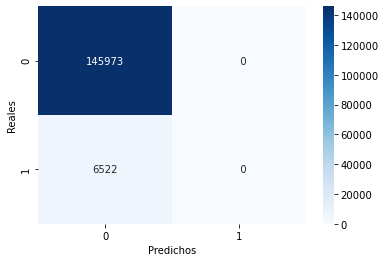

In [14]:
sns.heatmap(confusion_matrix(y_train, LR_ROCK.predict(x_train)), annot=True, fmt='4d', cmap='Blues')
plt.xlabel('Predichos')
plt.ylabel('Reales')

<a id="RLconc"></a>
#### Conclusión del modelo
La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria, en este caso en cocreto sería que pertece o no pertenece al género Rock. 

El modelo logístico creado para predecir la probabilidad de que una canción de rock sea clasificada correctamente da como resultado con el conjunto de test indican que el modelo ha predicho que ninguna de las canciones que entraran serían Rock. Esto da como resultado que el 95.7231% de las veces el modelo acertará, sin embargo habrá 4.2769% de veces que la canción que evaluaremos sí será una canción de Rock y el modelo no lo podrá predecir correctamente. Si bien pareciera un modelo alto en accuracy, debemos recordar que haciendo una regla de tres con las proporciones de la información género rock vs género total, el resultado nos dá un 95.7439%, con lo cual el modelo no predice mejor que una regla de tres proporcional. 

<a id="KNN"></a>
# Modelo KNN


In [15]:
x.shape

(217850, 7)

In [16]:
#Desarrollaremos el modelo con K=5
knn = KNeighborsClassifier(n_neighbors=5)
x_train, x_test, y_train, y_test = train_test_split(x, y)#Se entrena dataset entero
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);
# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)


In [17]:
x_test.head(100)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
26016,0.0410,0.686,0.8620,0.000000,0.1150,0.0832,0.2390
99822,0.1980,0.787,0.5080,0.000000,0.0834,0.1370,0.4570
198631,0.7580,0.685,0.4860,0.000000,0.7160,0.3230,0.8920
109724,0.9740,0.168,0.0613,0.246000,0.0836,0.0481,0.0399
54419,0.6420,0.593,0.4580,0.000000,0.1750,0.0460,0.6430
...,...,...,...,...,...,...,...
195934,0.0094,0.485,0.8550,0.002660,0.7870,0.0509,0.4120
141042,0.0152,0.560,0.5910,0.000391,0.2250,0.0420,0.2820
60465,0.8430,0.518,0.3820,0.000017,0.1100,0.4510,0.4960
29904,0.3210,0.672,0.6590,0.001690,0.1130,0.0322,0.4300


<a id="KNNEva"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance

In [18]:
# Evaluamos el accuracy del modelo
accuracy_score(y_test, y_pred)
print("El accuracy es ",accuracy_score(y_test, y_pred))

El accuracy es  0.9555110809173201


Recorremos a mano una lista de K para el modelo con K (1;10)

In [19]:
x_train_train, x_validation, y_train_train, y_validation = train_test_split(x_train, y_train, random_state=2)
#Subdividir     X_train en etapas
k_range = list(range(1, 10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_train, y_train_train)
    y_pred = knn.predict(x_validation)
    scores.append(accuracy_score(y_validation, y_pred))  

<a id="KNNV"></a>
#### Visualización para la búsqueda de mejor K


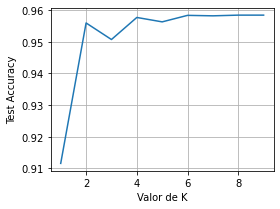

In [20]:
#Se puede apreciar que el mejor K 
plt.figure(figsize=(4,3))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Test Accuracy')
plt.grid(); plt.show()

In [21]:
# Evaluamos nuevamente el accuracy del modelo con este K sugerido 

knn = KNeighborsClassifier(n_neighbors=6)
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.9569799680517048

CROSS VALIDATION, Para cada K realizar distintas pruebas

In [22]:
# Usamos cross validation con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores_para_df = []

for i in range(2, 10): #No evaluamos con K=1 porque no es un valor viable
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [23]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head(7)
#Vemos un maximos score promedio en K=3

,score_medio,n_neighbors
0,0.955529,2
1,0.950473,3
2,0.956973,4
3,0.956049,5
4,0.957463,6
5,0.957237,7
6,0.957512,8


In [24]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
6,0.957512,8


Obtenemos el mejor score con el valor de K  acorde al Cross Validation

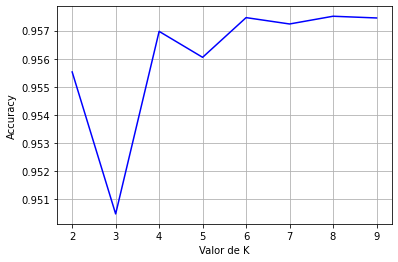

In [25]:
#GRAFICO DE LAS MEDIAS DE SCORE DONDE OBSERVAMOS EL MEJOR SCORE CON K=3
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [26]:
# Evaluamos nuevamente el accuracy del modelo con el resultado del Cross Validation

knn = KNeighborsClassifier(n_neighbors=8)
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print(KNN_Accuracy)

0.9570901345867837


<a id="KNNconc"></a>
#### Conclusión del modelo

El Modelo KNN, es supervisado y nos proporciona una técnica para obtener el K vecinos más cercanos según la distancia calculada.
Elegimos columnas adecuadas que contribuyan al análisis significativamente y
elegimos la variable target de acuerdo a la hipotesis formulada, aplicamos la funcion get_dummies,
a fin de convertir variables categóricas a indicadoras. 
Normalizamos de modo que los datos numéricos sean comparables,


Al alplicar el modelo se observa que los mejores valores K estarian entre los K=6 con Accuracy 0.957665 y K=8 con Accuracy 0.956649.

Para poder obtener un mejor hiperparámetro de K, utilizamos la tecnica de Cross-validation, elegimos un rango de k entre los valores de 2 a 10 obteniendo un resultado mejorado para el valor K=8.

Si bien pareciera un modelo alto en accuracy, debemos recordar que haciendo una regla de tres con las proporciones de la información género rock vs género total, el resultado nos dá un 95.7439%, con lo cual el modelo al hacer el test no predice mejor que una regla de tres proporcional. 

<a id="NB"></a>
# Modelo Naives Bayes


In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(163387, 7)
(54463, 7)
(163387,)
(54463,)


In [28]:
x_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
98785,0.378000,0.476,0.334,0.000000,0.2130,0.3880,0.0849
123070,0.774000,0.786,0.419,0.000000,0.0808,0.0313,0.9210
34817,0.000499,0.387,0.866,0.000015,0.2880,0.0318,0.7720
107146,0.342000,0.680,0.402,0.000003,0.0599,0.3360,0.6750
66587,0.161000,0.753,0.660,0.000000,0.2360,0.1330,0.1820


In [29]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

Con el modelo entrenado, vamos a predecir el conjunto de test:

In [30]:
y_pred = gnb.predict(x_test)

y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

Calculemos accuracy sobre el conjunto de test:

In [31]:
Gaussian_NB_Accuracy = round(accuracy_score(y_test,y_pred),2)
print(Gaussian_NB_Accuracy)

0.78


Calculemos la matriz de confusión para nuestro conjunto:

In [32]:
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',conf_mat)

Confusion matrix

 [[41222 10905]
 [ 1148  1188]]


<a id="NBV"></a>
#### Visualización del modelo
Realizaremos una matriz de confusión para visualizar los resultados del modelo

Text(33.0, 0.5, 'Reales')

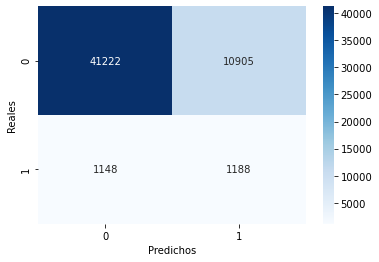

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d', cmap='Blues')
plt.xlabel('Predichos')
plt.ylabel('Reales')

<a id="NBconc"></a>
#### Conclusión del modelo

En este modelo(Naive Bayes), el cual es un Clasificador probabilistico que nos ayuda a resumir la independencia entre las variables predictoras. A partir de eso, tomamos en cuenta de que en funcion de los datos establecidos en el dataset, no tenian correlacion entre si.

A su vez, encontramos que este modelo si bien funciona, para la hipotesis que nosotros planteamos se puede apreciar que el modelo predijo correctamente sólo el 76% para la información que nosotros estabamos planteando. Por lo tanto si bien pareciera que es un modelo de buen accuracy, debemos recordar que haciendo una regla de tres con las proporciones de la información género rock vs género total, el resultado nos daría un 95.7439%, con lo cual el modelo al hacer el test no predice mejor que una regla de tres proporcional. 

<a id="AD"></a>
# Modelo Árbol de Decisión

In [34]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(163387, 7) (163387,) (54463, 7) (54463,)


In [35]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=1)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [36]:
# Usamos cross validation con 5 folds para buscar el mejor hiperparametro en este caso la profundidad
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores_para_df = []

for i in range(2, 10): 
    
    model = DecisionTreeClassifier(max_depth=i)
    
    max_depth = cross_val_score(model, x_train, y_train, cv=kf)
    
    # Para cada valor de max_depth, creamos un diccionario con el valor
    # de profundidad y la media de los scores
    dict_row_score = {'score_medio':np.mean(max_depth), 'max_depth':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [37]:
df_scores1= pd.DataFrame(scores_para_df)
df_scores1.head(7)

,score_medio,max_depth
0,0.957549,2
1,0.957549,3
2,0.957549,4
3,0.957530,5
4,0.957438,6
5,0.957402,7
6,0.957028,8


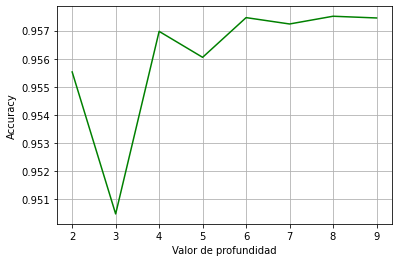

In [38]:
#GRAFICO DE LAS MEDIAS DE SCORE DONDE OBSERVAMOS EL MEJOR SCORE PARA DEPTH O PROFUNDIDAD=3
plt.plot(df_scores1['max_depth'], df_scores['score_medio'], color='g')
plt.xlabel('Valor de profundidad'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

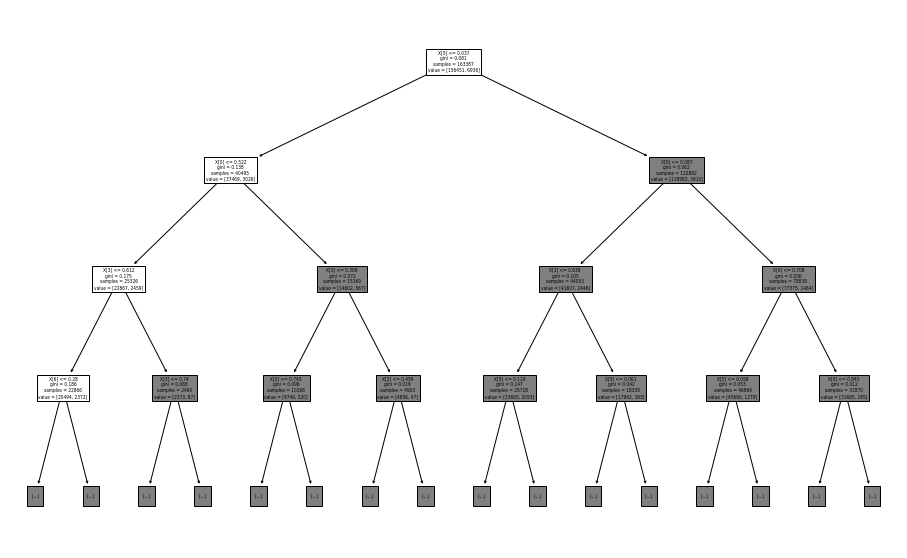

In [39]:
from sklearn import tree
plt.figure(figsize = (16,10))
tree.plot_tree(tree_clf, max_depth=3)
plt.show()

In [40]:
#from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, x, y, cv=5)
tree_scores

array([0.90842323, 0.9320863 , 0.93286665, 0.9444572 , 0.92240073])

curva ROC:

Sin entrenar: ROC AUC=0.500
Arbol de decision: ROC AUC=0.482


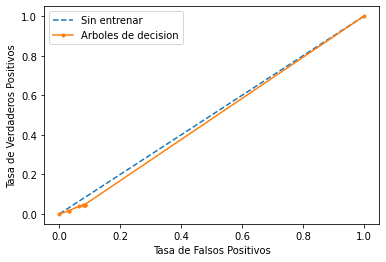

In [41]:
ns_probs = [0 for _ in range(len(y_test))]
# Entrenamos nuestro modelo de reg log
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
# Predecimos las probabilidades
lr_probs = tree_clf.predict_proba(x_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Arbol de decision: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Arboles de decision')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Visualización del modelo
Realizaremos una matriz de confusión para visualizar los resultados del modelo

In [42]:
y_pred= tree_clf.predict(x_test)
y_pred_proba= tree_clf.predict_proba(x_test)

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

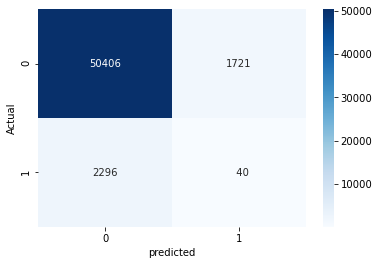

In [43]:
cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm, columns= np.unique(y_test), index=np.unique(y_test))
df_cm.index.name= 'Actual'
df_cm.columns.name='predicted'
sns.heatmap(df_cm, annot=True, fmt='4d', cmap='Blues')

In [44]:
DT_Accuracy = accuracy_score(y_test,y_pred)
print (DT_Accuracy)

0.9262435047647026


<a id="ADconc"></a>
#### Conclusión del modelo

Elegimos un modelo tree classifier ya que se adapta bien a las variables categóricas del modelo , el árbol identifica cuál es la variable con mayor significancia y genera grupos bien distribuidos para clasificar en base a las observaciones dadas.

Se aplica a un dataset limpio, donde las variables categóricas han pasado por un proceso de encoding y escalado , al mismo tiempo se usa la técnica de cross validation para asegurarnos que este bien balanceado y que la probabilidad calculada del hiperparametro es la adecuada . 
El género de la canción en la categoría rock , en este caso se obtiene un accuracy de 92.68%, inferior a la hipotesis nula por lo que el modelo no logra predecir mas alla de un calculo de propociones o las variables indicadas al modelo no le permiten diferenciar el genero rock de la cancion, siendo mas probable obtener una observacion distinta a rock.

lo anterior tambien se puede ver en la curva Roc, en la que el modelo esta por debajo con mas resultados de falsos positivos.

<a id="com"></a>
# Comparativa de modelos



In [45]:
### Resumen rendimiento de los modelos
modelo_performance_accuracy = pd.DataFrame({'Modelo': ['H0',
                                                      'LogisticRegression',  
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'Gaussian NB'],
                                            'Accuracy': [H0,
                                                         LR_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         Gaussian_NB_Accuracy]})
modelo_performance_accuracy.sort_values(by = "Accuracy", ascending = False)


,Modelo,Accuracy
0,H0,0.957439
1,LogisticRegression,0.957231
2,KNeighborsClassifier,0.957090
3,DecisionTreeClassifier,0.926244
4,Gaussian NB,0.780000


<a id="comcon"></a>
## Conclusiones

Se concluye que si bien los modelos tuvieron un buen accuracy éstos no llegaron a ser superiores que nuestra hipotesis.

En conclusión el dataset no ha sido el apropiado para la evaluación de nuestra hipotesis, a pesar de ser un dataset robusto, balanceado, limpio y standarizado. con las caracteristicas de las observaciones dadas no se logra diferenciar facilmente el genero de la cancion rock, valdria la pena incluir otras variables que nos permitan identificar la cancion de manera adecuada o comparar generos totalmente opuestos para evaluar como cambia la prediccion del modelo.

Por lo tanto, se decide hacer una comparativa entre los géneros Rock  y Clásico para ver si limitando los datos a sólo dos géneros los modelos mejoran la predicción.



# Segundo Análisis

<a id="xx"></a>
# Modelo en Dataset Balanceado



In [46]:
# Importamos el dataset que sólo tiene dos géneros
escaladochico= pd.read_csv('escalado_muestra.csv')

In [47]:
escaladochico.tail()

,Unnamed: 0,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,genre_Classical,genre_Rock
18523,226503,58,0.6700,0.718,0.593,0.000000,0.1720,0.0377,0.869,0,1
18524,226504,60,0.0340,0.521,0.933,0.000021,0.3300,0.1790,0.607,0,1
18525,226505,59,0.6710,0.618,0.769,0.241000,0.2760,0.0309,0.607,0,1
18526,226506,51,0.0543,0.681,0.662,0.005120,0.2060,0.1150,0.850,0,1
18527,226507,55,0.3850,0.493,0.461,0.000333,0.0985,0.0336,0.286,0,1


In [48]:
#HACER PROPORCIÓN DEL Classical
a=(escaladochico['genre_Classical']!=0).sum()#Son clásico
b=(escaladochico['genre_Classical']==0).sum()#No son clásico
c=a+b
k=((a/c)*100)
print("la proporcion de canciones en genero clásico es :",k.round(4))
#k es la proporcion de clásico en el total de canciones 
l=((b/c)*100)
print("la proporcion de canciones que no son del género clásico es :",l.round(4))


la proporcion de canciones en genero clásico es : 49.9568
la proporcion de canciones que no son del género clásico es : 50.0432


<a id="hipnulB"></a>
## Hipotesis Nula
    
H0: p = 50.0432 El modelo no puede predecir el género mejor que la probabilidad dada por la regla de tres. Es decir el accuracy de los modelos no da mayor que la proporción.

H1: p > 50.0432 El modelo puede predecir el género de la canción. Es decir que el modelo entrenado tenga un accuracy mayor a la proporción. 

In [49]:
H0 = l/100

<a id="defvarb"></a>
## Definición de variables

A continuación se definirán las features y el target objetivo.
También se prepara el set de testeo para evaluar los modelos. 
Se guarda el 30% de los datos para hacer luego la prueba.

In [50]:
# Preparamos la matriz de features y el target objetivo
x = escaladochico.loc[:,('acousticness', 'danceability', 'energy','instrumentalness',
'liveness','speechiness','valence') ]
y = escaladochico['genre_Classical'] # Columna de 0 y 1, en donde 1 es que la canción pertenece al género Rock

In [51]:
# Separamos un set de testeo para evaluar el modelo, separamos un 30% de los mismos para luego la prueba
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state = 1)

<a id="RLB"></a>
# Modelo Regresión Logistica

El objetivo es predicir la característica del género de una observación en función del resto de sus características (variables independientes --> variable objetivo/dependiente).

In [52]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.500038553473668, 0.4984709480122324)

In [53]:
# Ajustamos el modelo
LR_ROCK = LogisticRegression()
LR_ROCK.fit(x_train, y_train)

LogisticRegression()

In [54]:
# Realizo una predicción

y_pred = LR_ROCK.predict(x_test)

<a id="RLEvaB"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance

In [55]:
LR_Accuracy = accuracy_score(y_train, LR_ROCK.predict(x_train))
print(LR_Accuracy)

0.9289073945562495


<a id="RLVB"></a>
#### Visualización del modelo
Realizaremos una matriz de confusión para visualizar los resultados del modelo

Text(33.0, 0.5, 'Reales')

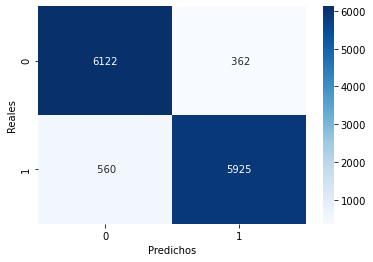

In [56]:
sns.heatmap(confusion_matrix(y_train, LR_ROCK.predict(x_train)), annot=True, fmt='4d', cmap='Blues')
plt.xlabel('Predichos')
plt.ylabel('Reales')

<a id="RLconcB"></a>
#### Conclusión del modelo
La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria, en este caso en cocreto sería que pertece o no pertenece al género Rock. 

El modelo logístico creado para la correcta clasificación acierta en un 92,89%  en su predicción. Si comparamos este número a nuestra hipotesis nula, el modelo predice mejor.

<a id="KNNB"></a>
# Modelo KNN

In [57]:
x.shape

(18528, 7)

In [58]:
#Desarrollaremos el modelo con K=5
knn = KNeighborsClassifier(n_neighbors=5)
x_train, x_test, y_train, y_test = train_test_split(x, y)#Se entrena dataset entero
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);
# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)


In [59]:
x_test.head(100)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
15865,0.456000,0.628,0.56700,0.00174,0.0814,0.0646,0.7150
1968,0.957000,0.309,0.10100,0.51100,0.6800,0.0386,0.1430
8168,0.986000,0.169,0.03220,0.95300,0.0692,0.0396,0.0345
845,0.988000,0.326,0.09930,0.91600,0.1080,0.0720,0.4170
7627,0.981000,0.399,0.11800,0.57900,0.1610,0.0522,0.2070
...,...,...,...,...,...,...,...
1379,0.950000,0.407,0.00722,0.03750,0.1210,0.0391,0.1650
17622,0.649000,0.556,0.39300,0.00000,0.2920,0.0319,0.6040
8119,0.002090,0.441,0.95500,0.00905,0.1490,0.0689,0.2030
2274,0.000013,0.472,0.97500,0.47900,0.1450,0.1110,0.7180


<a id="KNNEvaB"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance

In [60]:
# Evaluamos el accuracy del modelo
accuracy_score(y_test, y_pred)
print("El accuracy es ",accuracy_score(y_test, y_pred))

El accuracy es  0.9352331606217616


Recorremos a mano una lista de K para el modelo con K (1;10)

In [61]:
x_train_train, x_validation, y_train_train, y_validation = train_test_split(x_train, y_train, random_state=2)
#Subdividir     X_train en etapas
k_range = list(range(2, 10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_train, y_train_train)
    y_pred = knn.predict(x_validation)
    scores.append(accuracy_score(y_validation, y_pred))  

<a id="KNNVB"></a>
#### Visualización para la búsqueda de mejor K

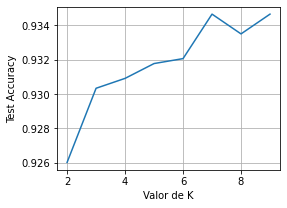

In [62]:
#Se puede apreciar que el mejor K 
plt.figure(figsize=(4,3))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Test Accuracy')
plt.grid(); plt.show()

In [63]:
# Evaluamos nuevamente el accuracy del modelo con este K sugerido 

knn = KNeighborsClassifier(n_neighbors=6)
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.9371761658031088

In [64]:
# Evaluamos nuevamente el accuracy del modelo con este K sugerido 

knn = KNeighborsClassifier(n_neighbors=7)
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.937392055267703

CROSS VALIDATION, Para cada K realizar distintas pruebas

In [65]:
# Usamos cross validation con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores_para_df = []

for i in range(2, 10): #No evaluamos con K=1 porque no es un valor viable
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [66]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head(7)
#Vemos un maximos score promedio en K=3

,score_medio,n_neighbors
0,0.925230,2
1,0.930340,3
2,0.933794,4
3,0.933434,5
4,0.935953,6
5,0.935953,7
6,0.936313,8


In [67]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
6,0.936313,8


Obtenemos el mejor score con el valor de K  acorde al Cross Validation


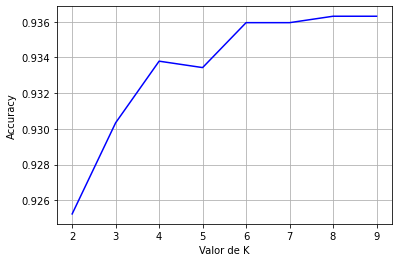

In [68]:
#GRAFICO DE LAS MEDIAS DE SCORE DONDE OBSERVAMOS EL MEJOR SCORE
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [69]:
# Evaluamos nuevamente el accuracy del modelo con el resultado del Cross Validation

knn = KNeighborsClassifier(n_neighbors=8)
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print(KNN_Accuracy)

0.9382556131260794


In [89]:
# Usamos cross validation con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores_para_df = []

for i in range(2, 18): #No evaluamos con K=1 porque no es un valor viable
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [91]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.head(18)

,score_medio,n_neighbors
0,0.925230,2
1,0.930340,3
2,0.933794,4
3,0.933434,5
4,0.935953,6
5,0.935953,7
6,0.936313,8
7,0.936313,9
8,0.936960,10
9,0.936673,11


In [92]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
14,0.939479,16


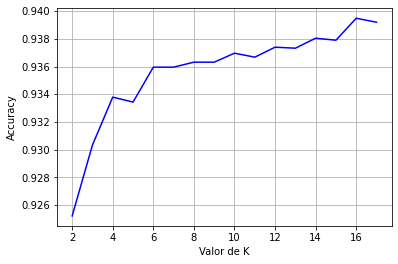

In [93]:
#GRAFICO DE LAS MEDIAS DE SCORE DONDE OBSERVAMOS EL MEJOR SCORE
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [94]:
# Evaluamos nuevamente el accuracy del modelo con el resultado del Cross Validation

knn = KNeighborsClassifier(n_neighbors=16)
# Ajustamos a los datos de entrenamiento.
knn.fit(x_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(x_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print(KNN_Accuracy)

0.9423575129533679


<a id="KNNconcB"></a>
#### Conclusión del modelo

El Modelo KNN, es supervisado y nos proporciona una técnica para obtener el K vecinos más cercanos según la distancia calculada.
Elegimos columnas adecuadas que contribuyan al análisis significativamente y
elegimos la variable target de acuerdo a la hipotesis formulada, aplicamos la funcion get_dummies,
a fin de convertir variables categóricas a indicadoras. 
Normalizamos de modo que los datos numéricos sean comparables,

Para poder obtener un mejor hiperparámetro de K, utilizamos la tecnica de Cross-validation, elegimos un rango de k entre los valores de 2 a 10 obteniendo un resultado mejorado para el valor K=8. Este modelo logra predecir mejor que la hipotesis nula. 

<a id="NBB"></a>
# Modelo Naives Bayes


In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13896, 7)
(4632, 7)
(13896,)
(4632,)


In [71]:
x_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
5065,0.990,0.393,0.1120,0.924,0.1230,0.0348,0.487
16117,0.666,0.692,0.4210,0.147,0.1040,0.0295,0.832
16256,0.834,0.518,0.5430,0.000,0.2000,0.0297,0.579
211,0.987,0.453,0.0567,0.948,0.1000,0.0394,0.371
16238,0.511,0.518,0.6560,0.156,0.0679,0.0264,0.203


In [72]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

Con el modelo entrenado, vamos a predecir el conjunto de test:

In [73]:
y_pred = gnb.predict(x_test)

y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

Calculemos accuracy sobre el conjunto de test:

In [74]:
Gaussian_NB_Accuracy = round(accuracy_score(y_test,y_pred),2)
print(Gaussian_NB_Accuracy)

0.92


Calculemos la matriz de confusión para nuestro conjunto:

In [75]:
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',conf_mat)

Confusion matrix

 [[2143  173]
 [ 201 2115]]


<a id="NBVB"></a>
#### Visualización del modelo
Realizaremos una matriz de confusión para visualizar los resultados del modelo

Text(33.0, 0.5, 'Reales')

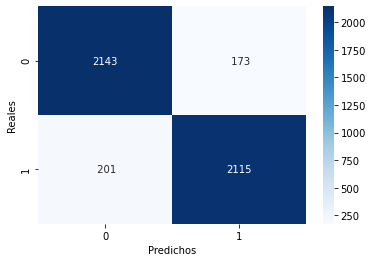

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d', cmap='Blues')
plt.xlabel('Predichos')
plt.ylabel('Reales')

<a id="NBconcB"></a>
#### Conclusión del modelo

En este modelo(Naive Bayes), el cual es un Clasificador probabilistico que nos ayuda a resumir la independencia entre las variables predictoras. A partir de eso, tomamos en cuenta de que en funcion de los datos establecidos en el dataset, no tenian correlacion entre si.

A su vez, encontramos que este modelo funciona y da mayor su fiabilidad que la hipotesis nula.

<a id="ADB"></a>
# Modelo Árbol de Decisión

In [77]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13896, 7) (13896,) (4632, 7) (4632,)


In [78]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=1)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [79]:
# Usamos cross validation con 5 folds para buscar el mejor hiperparametro en este caso la profundidad
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores_para_df = []

for i in range(2, 10): 
    
    model = DecisionTreeClassifier(max_depth=i)
    
    max_depth = cross_val_score(model, x_train, y_train, cv=kf)
    
    # Para cada valor de max_depth, creamos un diccionario con el valor
    # de profundidad y la media de los scores
    dict_row_score = {'score_medio':np.mean(max_depth), 'max_depth':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [80]:
df_scores1= pd.DataFrame(scores_para_df)
df_scores1.head(7)

,score_medio,max_depth
0,0.917386,2
1,0.924654,3
2,0.931923,4
3,0.933146,5
4,0.933866,6
5,0.931923,7
6,0.931563,8


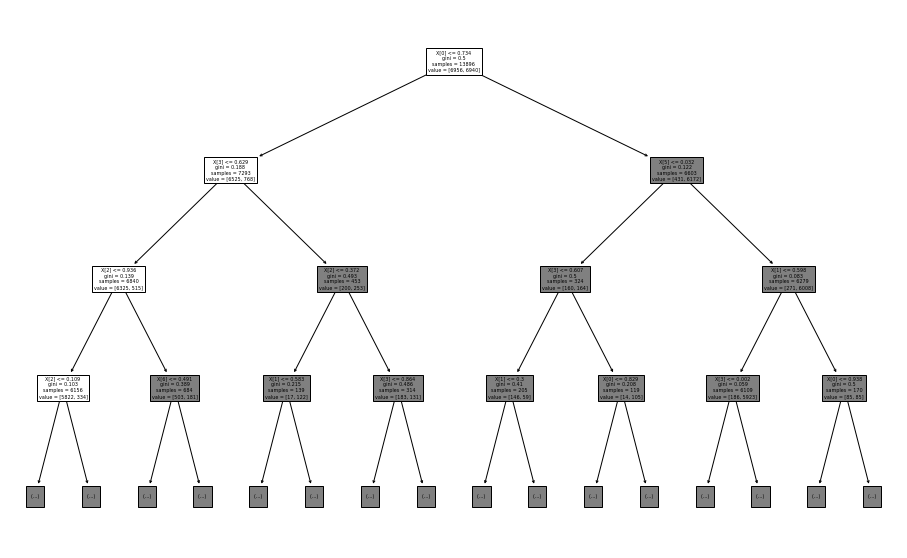

In [81]:
from sklearn import tree
#if tree_clf (max_depth=5, random_state=1):
plt.figure(figsize = (16,10))
tree.plot_tree(tree_clf, max_depth=3)
plt.show()

In [82]:
#from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, x, y, cv=5)
tree_scores

array([0.91851052, 0.90744738, 0.92201835, 0.90607287, 0.90472335])

Curva ROC:

Sin entrenar: ROC AUC=0.500
Arbol de decision: ROC AUC=0.914


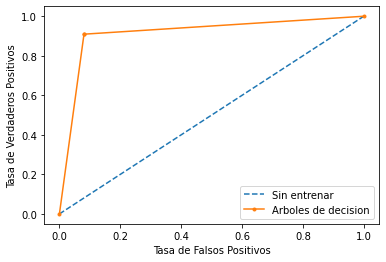

In [83]:
ns_probs = [0 for _ in range(len(y_test))]
# Entrenamos nuestro modelo de reg log
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
# Predecimos las probabilidades
lr_probs = tree_clf.predict_proba(x_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Arbol de decision: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Arboles de decision')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Visualización del modelo
Realizaremos una matriz de confusión para visualizar los resultados del modelo

In [84]:
y_pred= tree_clf.predict(x_test)
y_pred_proba= tree_clf.predict_proba(x_test)

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

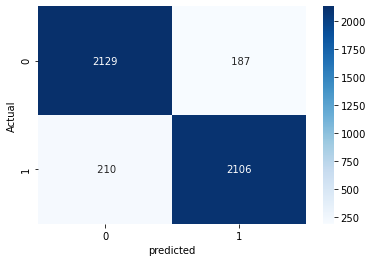

In [85]:
cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm, columns= np.unique(y_test), index=np.unique(y_test))
df_cm.index.name= 'Actual'
df_cm.columns.name='predicted'
sns.heatmap(df_cm, annot=True, fmt='4d', cmap='Blues')

In [86]:
DT_Accuracy = accuracy_score(y_test,y_pred)
print (DT_Accuracy)

0.9142918825561313


<a id="ADconcB"></a>
#### Conclusión del modelo

cuando filtramos por genero classic y comedy, el modelo predice mejor, con un accuracy del 94% , superior al de la hipotesis nula, el modelo es capaz bajo estas condiciones de distinguir entre genero classic y comedy.

la curva ROC, confirma lo anterios y muestra como el modelo de aroles de dcision tiene un alto nivel de prediccion y de verdaderos positivos.

confirmamos entonces que para este dataset en particular, los modelos mejoran su prediccion cuando se comparan observaciones en generos opuestos o poca afinidad.


<a id="comB"></a>
# Comparativa de modelos


In [87]:
### Resumen rendimiento de los modelos
modelo_performance_accuracy = pd.DataFrame({'Modelo': ['H0',
                                                      'LogisticRegression',  
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'Gaussian NB'],
                                            'Accuracy': [H0,
                                                         LR_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         Gaussian_NB_Accuracy]})
modelo_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Modelo,Accuracy
2,KNeighborsClassifier,0.938256
1,LogisticRegression,0.928907
4,Gaussian NB,0.920000
3,DecisionTreeClassifier,0.914292
0,H0,0.500432


<a id="comconcB"></a>
## Conclusiones

Se concluye que los modelos funcionar y predicen correctamente si el dataset se encuentra balanceado. 
Podemos rechazar la hipotesis nula. El modelo que mejor estima el género musical es K Neighbors.